# Semianr 7 - Applied Quantitative Logistics

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random

## Traveling Salesman Problem

In [2]:
# list(np.random.permutation(15))

In [3]:
# list(np.random.randint(0, 100, 15))

In [4]:
# list(np.random.randint(0, 100, 15))

In [5]:
def tsp():
    
    x = [24, 74, 83, 53, 7, 96, 10, 33, 53, 92, 13, 35, 97, 90, 97]
    y = [77, 91, 60, 4, 93, 18, 18, 20, 89, 79, 62, 32, 65, 11, 62]
    
    n = len(x)
    
    d = np.zeros([n, n])
    
    for i in range(0, n-1):
        for j in range(i+1, n):
            d[i][j] = math.sqrt((x[i] - x[j])**2 + (y[i]-y[j])**2)
            d[j][i] = d[i][j]
            
    xmin = 0
    xmax = 100
    
    ymin = 0
    ymax = 100
    
    model = {'n': n,
            'x': x,
            'y': y,
            'd': d,
            'xmin': xmin,
            'xmax': xmax,
            'ymin': ymin,
            'ymax': ymax}
        
    return model

### Create Random Solution

In [6]:
def createRandomSolution(model):
    n = model['n']
    sol = list(np.random.permutation(n))
    return sol

### Calculating the Length - Cost Function

# <span style='color:red'> I modified it since the original one changes the size of offsprings </span> 

In [41]:
def TourLength(tour, model):
    n = model['n']
    length = tour.copy()
    length.append(tour[0])
    
    L = 0
    
    for k in range(0, n):
        i = length[k]
        j = length[k+1]
        
        L = L + model['d'][i][j]

    return L

### Roulette Wheele Selection

In [9]:
def rouletteWheelSelection(p):
    r = random.random()
    
    c = np.cumsum(p)
    
    indexes = [
        index for index in range(len(c))
        if c[index] > r
    ]
    
    return indexes[0]

# HW4 - Applied Quantitative Logistics

Implement 3 Mutation methods which we discussed during the seminar for problems with permutation:

1) Swap Mutation

2) Reversion Mutation

3) Insertion (Removing and inserting in a new place)

4) Create a function for selecting each mutation randomly by the roulette wheel approach

5) Use a Genetic Algorithm to solve this problem (For simplicity just put the probability of crossover equal to 0 - which means we don't use crossover)

6) Print all best costs with iterations and plot the result based on iteration (Not NFE)


Instruction for submission:

- Please submit your solutions in (.ipynb) format to my email (msohrabi@hse.ru).

- Deadline: **April 13, 2023, 11:59 pm.**

- The subject of the email and file name: **[HW4_AQL]-YOUR_NAME**

### Mutation

In [10]:
def swapMutation(solution):
    index1, index2 = np.random.choice(len(solution), size=2, replace=False)
    solution[index1], solution[index2] = solution[index2], solution[index1]
    return solution

In [11]:
def reversionMutation(solution):
    index1, index2 = np.random.choice(len(solution), size=2, replace=False)
    solution[min(index1, index2):max(index1, index2)+1] = solution[min(index1, index2):max(index1, index2)+1][::-1]
    return solution

In [12]:
def insertionMutation(solution):
    index1, index2 = np.random.choice(len(solution), size=2, replace=False)
    value = solution.pop(index1)
    solution.insert(index2, value)
    return solution

In [13]:
def mutationSelector():
    probabilities = [0.33, 0.34, 0.33]
    method_index = rouletteWheelSelection(probabilities)
#    print("method_index",method_index)
    if method_index == 0:
        return swapMutation
    elif method_index == 1:
        return reversionMutation
    else:
        return insertionMutation
 

## Selection

In [14]:
def tournamentSelection(population, fitness, tournamentSize):
    tournament = random.sample(range(len(population)), tournamentSize)
    fittest = tournament[0]
    for i in tournament[1:]:
        if fitness[i] < fitness[fittest]:
            fittest = i
    return population[fittest]

## Genetic Algorithm (GA)

In [98]:
def GeneticAlgorithm(model, populationSize, maxIterations, mutationRate, tournamentSize):
    # Initialize the population
    population = [createRandomSolution(model) for i in range(populationSize)]
#    print("population",population)
    # Evaluate the fitness of each solution
    fitness = [TourLength(sol, model) for sol in population]
    
    # Store the best fitness and solution found so far
    bestFitness = min(fitness)
    bestSolution = population[fitness.index(bestFitness)]
    
    # Create arrays to store the best fitness and average fitness at each iteration
    bestFitnessList = [bestFitness]
    avgFitnessList = [np.mean(fitness)]
    
    # Start the iterations
    for it in range(maxIterations):
        # Select two parents for each offspring using tournament selection
        offspring = []
        for i in range(populationSize):
            parent1 = tournamentSelection(population, fitness, tournamentSize)
            parent2 = tournamentSelection(population, fitness, tournamentSize)

            # Randomly select a parent to create the child
            if random.random() > 0.5:
                child = parent1.copy()
            else:
                child = parent2.copy()
            
            # Apply mutation to the child solution
            if random.random() > mutationRate:
                mutationMethod = mutationSelector()
                #print("child at",i,": \n", child)
                child = mutationMethod(child)
                #print("Newchild at",i,": \n", child)
            
            # Add the child solution to the offspring
            offspring.append(child)
            
        # Merge the original population and offspring
        mergedPopulation = population + offspring
        
        # Shuffle the merged population
        random.shuffle(mergedPopulation)
        
        # Select the first populationSize elements as the new population
        population = mergedPopulation[:populationSize]

        # Evaluate the fitness of each solution
        fitness = [TourLength(sol, model) for sol in population]
        
        # Update the best fitness and solution found so far
        if min(fitness) < bestFitness:
            bestFitness = min(fitness)
            bestSolution = population[fitness.index(bestFitness)]
            
        # Store the best fitness and average fitness at each iteration
        bestFitnessList.append(bestFitness)
        avgFitnessList.append(np.mean(fitness))
        
        # Print the best fitness at this iteration
        #print("Iteration ", it+1, ": Best Fitness = ", bestFitness,": Best Solution = ", bestSolution)
    
    # Print the best fitness overall
    print("Best Solution : ", bestSolution,"Best Fitness =",bestFitness )  
    # Plot the convergence curve
    plt.plot(range(maxIterations+1), bestFitnessList, label='Best')
    plt.plot(range(maxIterations+1), avgFitnessList, label='Average')
    plt.legend()
    plt.xlabel('Iteration')
    plt.ylabel('Fitness')
    plt.show()
    
    # Return the best solution found
    return bestFitnessList


# Results

## Find the optimal parameters 

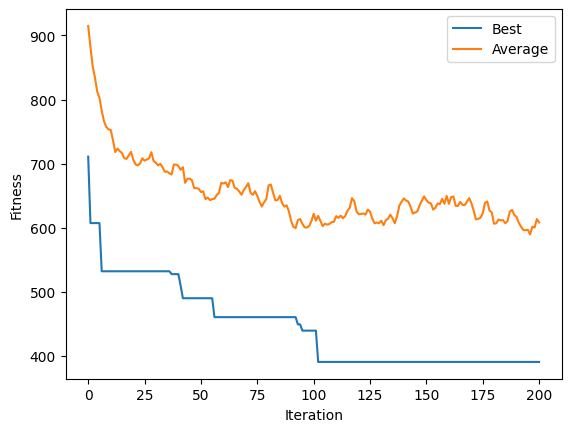

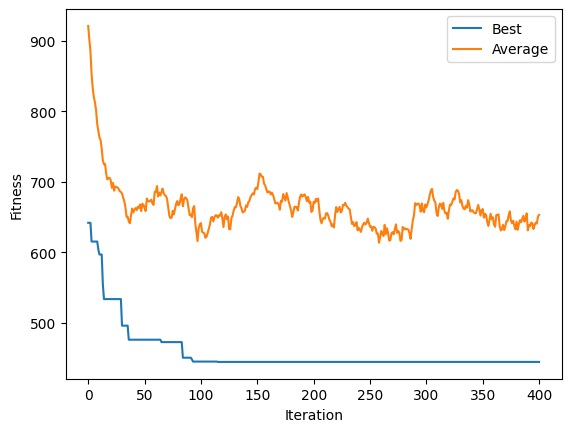

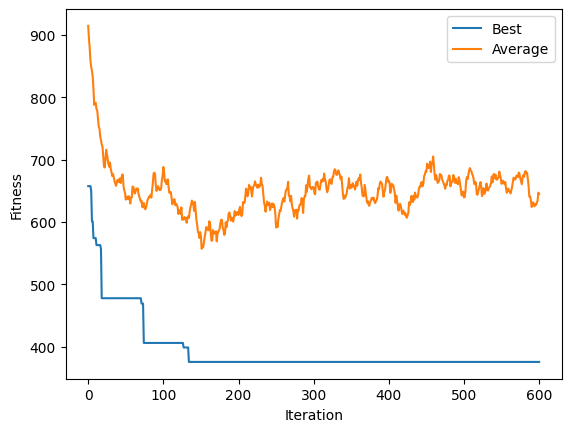

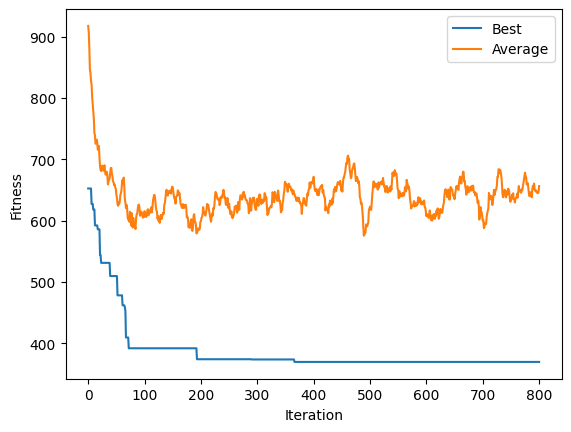

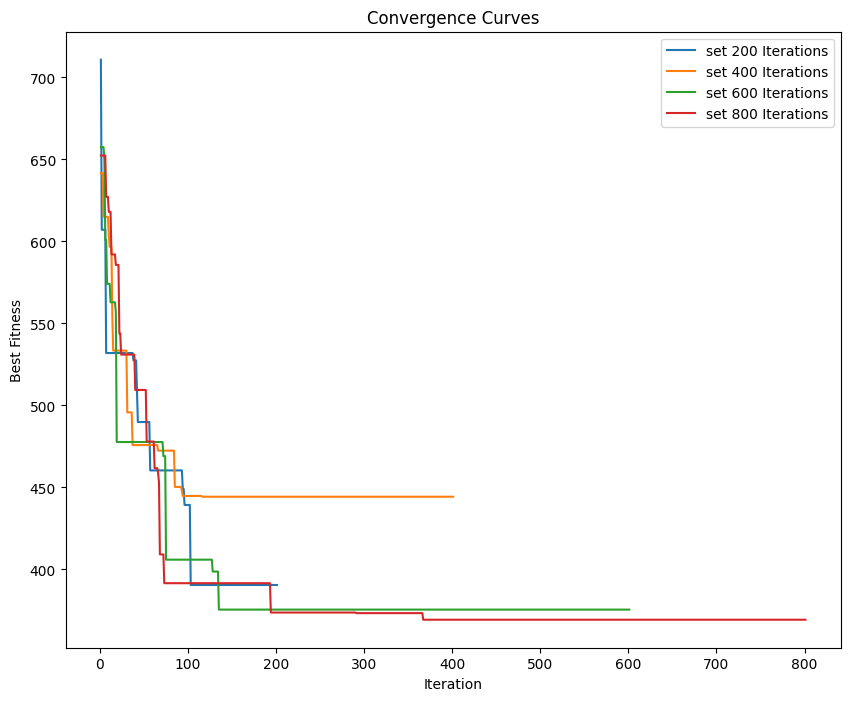

In [82]:
params1 = [
    {"name": "set 200 Iterations", "populationSize": 100, "maxIterations": 200, "mutationRate": 0.3, "tournamentSize": 2},
    {"name": "set 400 Iterations", "populationSize": 100, "maxIterations": 400, "mutationRate": 0.3, "tournamentSize": 2},
    {"name": "set 600 Iterations", "populationSize": 100, "maxIterations": 600, "mutationRate": 0.3, "tournamentSize": 2},
    {"name": "set 800 Iterations", "populationSize": 100, "maxIterations": 800, "mutationRate": 0.3, "tournamentSize": 2},
]


best_fitness_values = {}
for param_set in params1:
    random.seed(0)
    model = tsp()
    populationSize = param_set["populationSize"]
    maxIterations = param_set["maxIterations"]
    mutationRate = param_set["mutationRate"]
    tournamentSize = param_set["tournamentSize"]
    best_fitness = GeneticAlgorithm(model, populationSize, maxIterations, mutationRate, tournamentSize)
    best_fitness_values[param_set["name"]] = best_fitness


plt.figure(figsize=(10, 8))
max_iterations = 1000
for name, values in best_fitness_values.items():
    best_fitness = values + [None] * (max_iterations - len(values))
    x = np.arange(1, max_iterations+1)
    plt.plot(x, np.array(best_fitness), label=name)
plt.xlabel("Iteration")
plt.ylabel("Best Fitness")
plt.title("Convergence Curves")
plt.legend()
plt.show()


## 600 for the iteration size

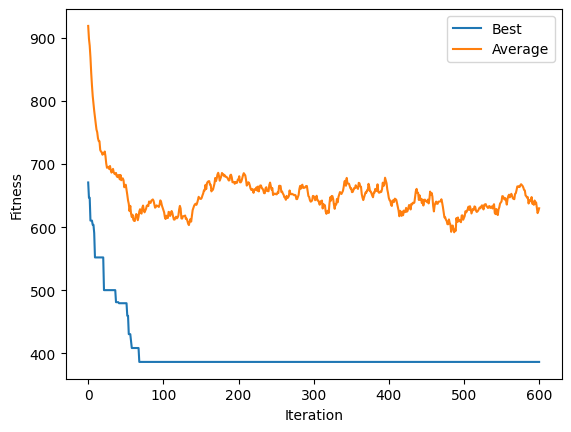

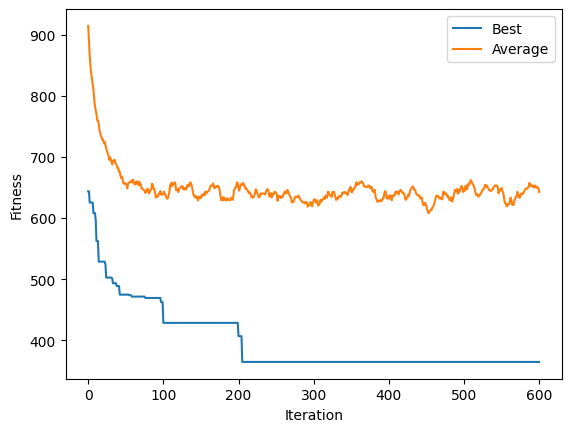

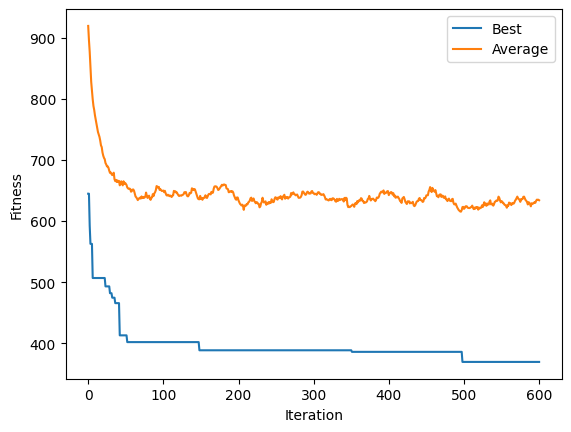

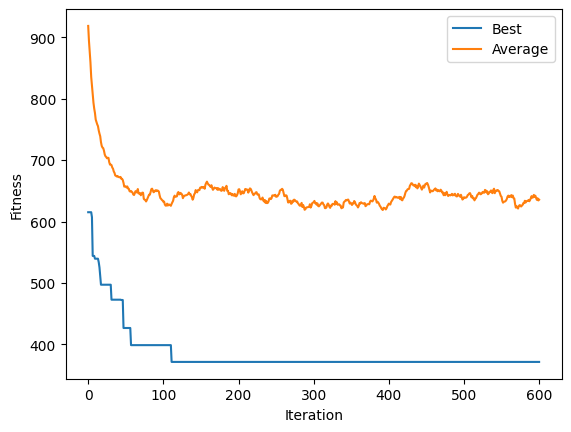

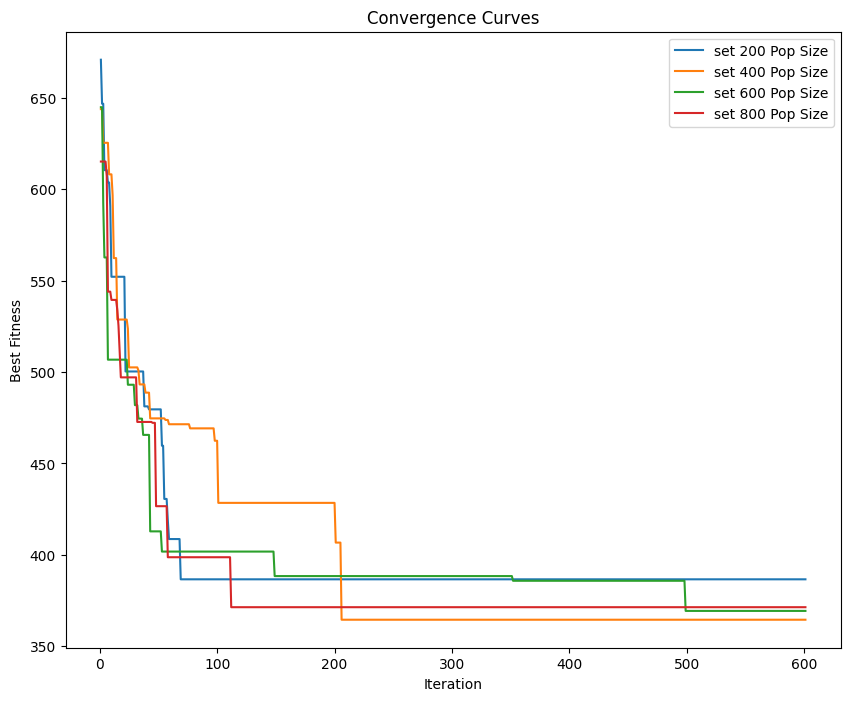

In [86]:
params2 = [    
    {"name": "set 200 Pop Size", "populationSize": 200, "maxIterations": 600, "mutationRate": 0.3, "tournamentSize": 2},    
    {"name": "set 400 Pop Size", "populationSize": 400, "maxIterations": 600, "mutationRate": 0.3, "tournamentSize": 2},    
    {"name": "set 600 Pop Size", "populationSize": 600, "maxIterations": 600, "mutationRate": 0.3, "tournamentSize": 2},    
    {"name": "set 800 Pop Size", "populationSize": 800, "maxIterations": 600, "mutationRate": 0.3, "tournamentSize": 2},]


best_fitness_values = {}
for param_set in params2:
    random.seed(0)
    model = tsp()
    populationSize = param_set["populationSize"]
    maxIterations = param_set["maxIterations"]
    mutationRate = param_set["mutationRate"]
    tournamentSize = param_set["tournamentSize"]
    best_fitness = GeneticAlgorithm(model, populationSize, maxIterations, mutationRate, tournamentSize)
    best_fitness_values[param_set["name"]] = best_fitness


plt.figure(figsize=(10, 8))
max_iterations = 1000
for name, values in best_fitness_values.items():
    best_fitness = values + [None] * (max_iterations - len(values))
    x = np.arange(1, max_iterations+1)
    plt.plot(x, np.array(best_fitness), label=name)
plt.xlabel("Iteration")
plt.ylabel("Best Fitness")
plt.title("Convergence Curves")
plt.legend()
plt.show()


## 600 for the population size

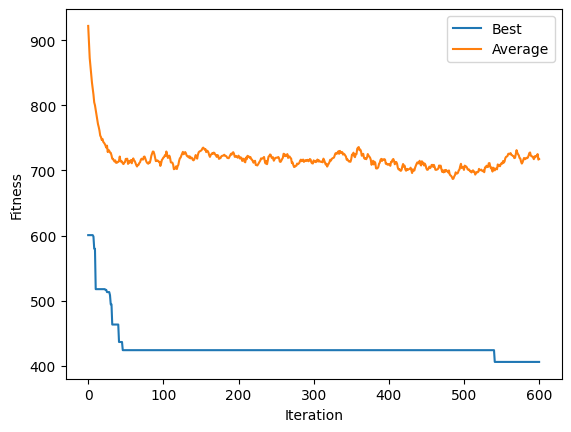

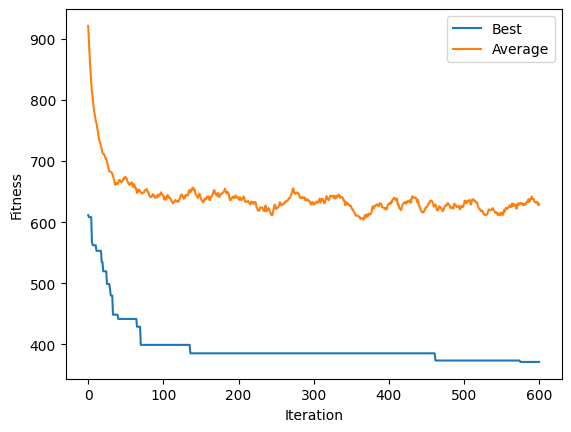

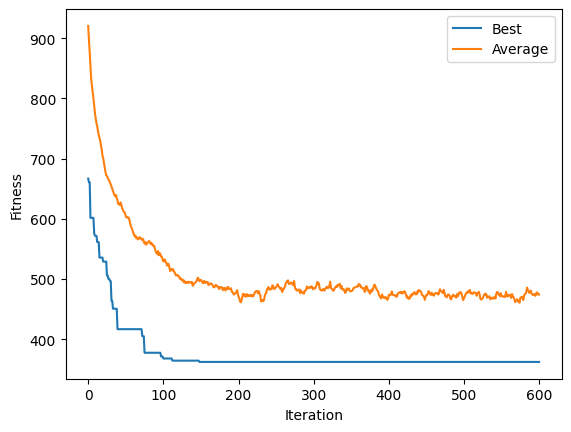

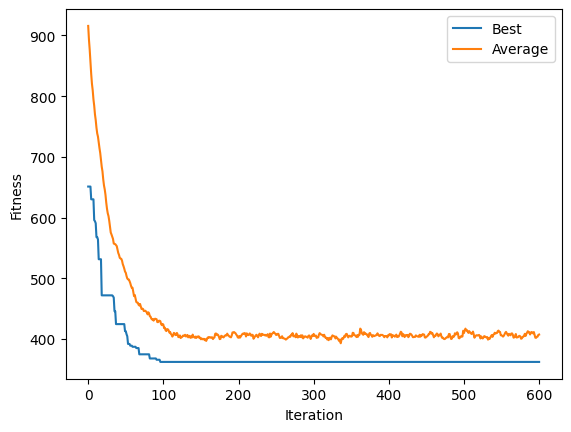

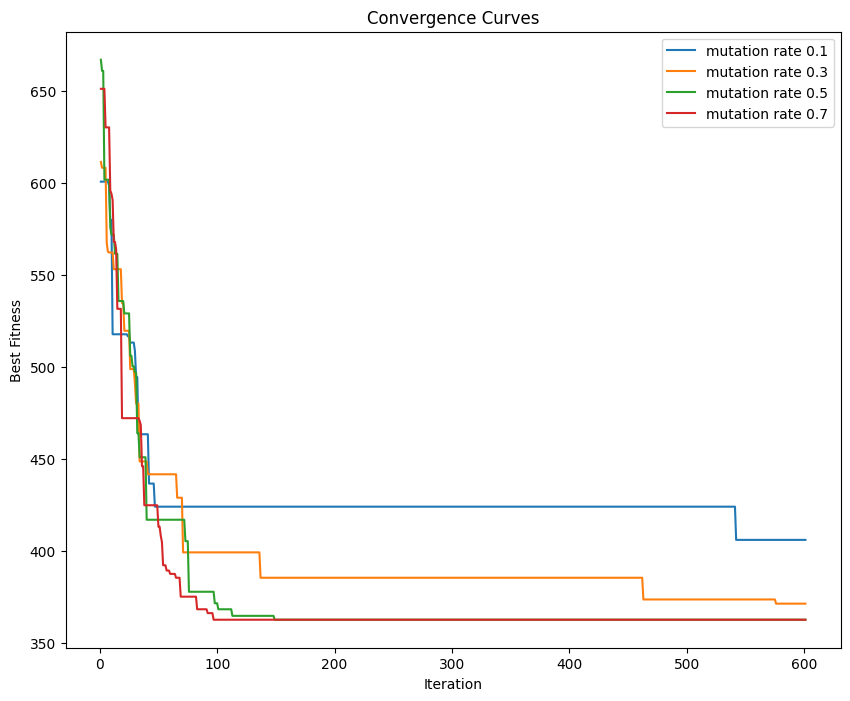

In [90]:
params3 = [    
    {"name": "mutation rate 0.1", "populationSize": 600, "maxIterations": 600, "mutationRate": 0.1, "tournamentSize": 2},    
    #{"name": "mutation rate 0.2", "populationSize": 600, "maxIterations": 600, "mutationRate": 0.2, "tournamentSize": 2},    
    {"name": "mutation rate 0.3", "populationSize": 600, "maxIterations": 600, "mutationRate": 0.3, "tournamentSize": 2},    
    #{"name": "mutation rate 0.4", "populationSize": 600, "maxIterations": 600, "mutationRate": 0.4, "tournamentSize": 2},    
    {"name": "mutation rate 0.5", "populationSize": 600, "maxIterations": 600, "mutationRate": 0.5, "tournamentSize": 2},    
    #{"name": "mutation rate 0.6", "populationSize": 600, "maxIterations": 600, "mutationRate": 0.6, "tournamentSize": 2},    
    {"name": "mutation rate 0.7", "populationSize": 600, "maxIterations": 600, "mutationRate": 0.7, "tournamentSize": 2},]

# Find the maximum number of iterations across all parameter sets
max_iterations = 1000

# Run the algorithm for each set of parameters and collect the best fitness values
best_fitness_values = {}
for param_set in params3:
    random.seed(0)
    model = tsp()
    populationSize = param_set["populationSize"]
    maxIterations = param_set["maxIterations"]
    mutationRate = param_set["mutationRate"]
    tournamentSize = param_set["tournamentSize"]
    best_fitness = GeneticAlgorithm(model, populationSize, maxIterations, mutationRate, tournamentSize)
    best_fitness_values[param_set["name"]] = best_fitness


plt.figure(figsize=(10, 8))
for name, values in best_fitness_values.items():
    best_fitness = values + [None] * (max_iterations - len(values))
    x = np.arange(1, max_iterations+1)
    plt.plot(x, np.array(best_fitness), label=name)
plt.xlabel("Iteration")
plt.ylabel("Best Fitness")
plt.title("Convergence Curves")
plt.legend()
plt.show()


# 0.7 for the mutation rate

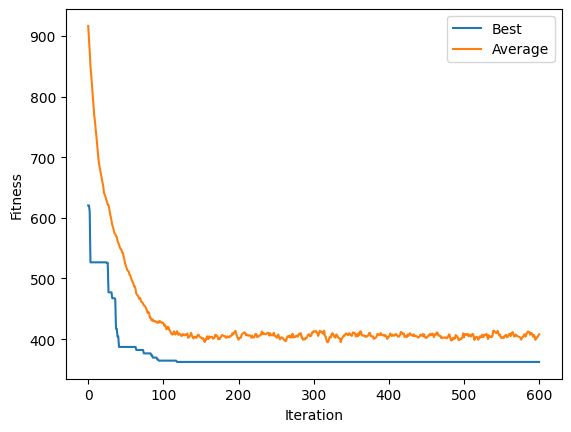

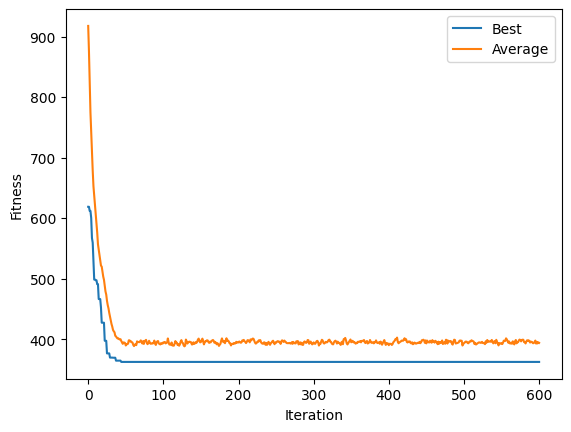

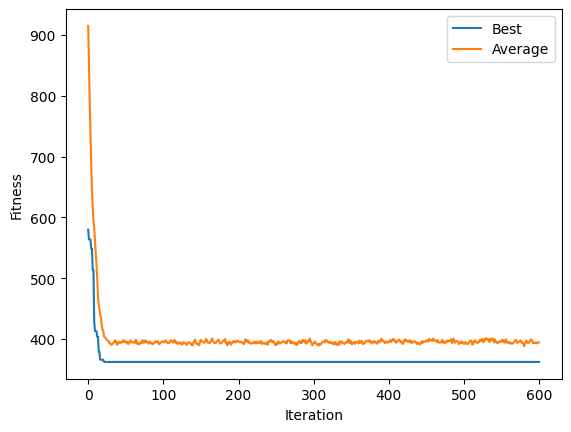

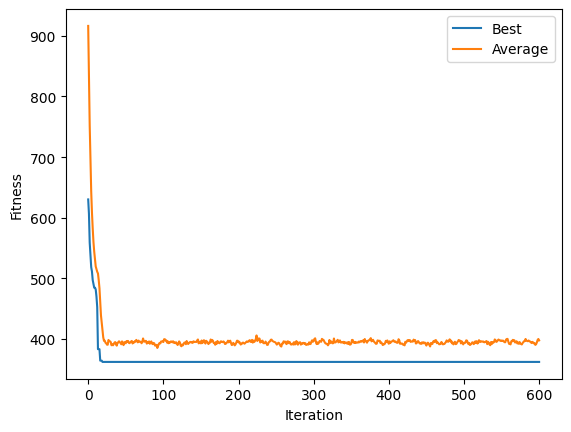

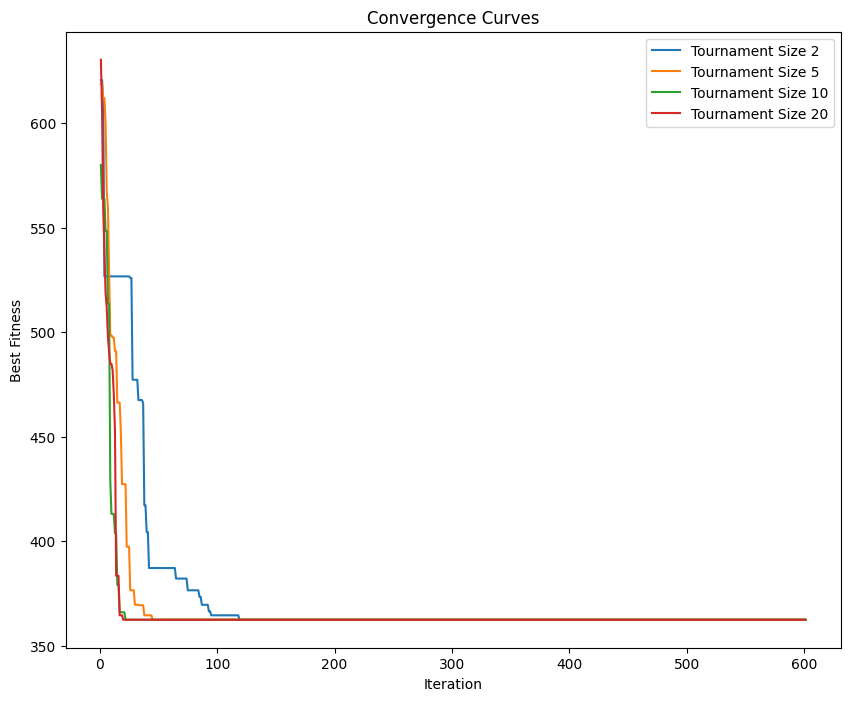

In [91]:
params4 = [
    {"name": "Tournament Size 2", "populationSize": 600, "maxIterations": 600, "mutationRate": 0.7, "tournamentSize": 2},
    {"name": "Tournament Size 5", "populationSize": 600, "maxIterations": 600, "mutationRate": 0.7, "tournamentSize": 5},
    {"name": "Tournament Size 10", "populationSize": 600, "maxIterations": 600, "mutationRate": 0.7, "tournamentSize": 10},
    {"name": "Tournament Size 20", "populationSize": 600, "maxIterations": 600, "mutationRate": 0.7, "tournamentSize": 20},
]


best_fitness_values = {}
for param_set in params4:
    random.seed(0)
    model = tsp()
    populationSize = param_set["populationSize"]
    maxIterations = param_set["maxIterations"]
    mutationRate = param_set["mutationRate"]
    tournamentSize = param_set["tournamentSize"]
    best_fitness = GeneticAlgorithm(model, populationSize, maxIterations, mutationRate, tournamentSize)
    best_fitness_values[param_set["name"]] = best_fitness

plt.figure(figsize=(10, 8))
max_iterations = 1000
for name, values in best_fitness_values.items():
    best_fitness = values + [None] * (max_iterations - len(values))
    x = np.arange(1, max_iterations+1)
    plt.plot(x, np.array(best_fitness), label=name)
plt.xlabel("Iteration")
plt.ylabel("Best Fitness")
plt.title("Convergence Curves")
plt.legend()
plt.show()


# 20 for the tournament size

# Final model

Best Solution :  [14, 2, 5, 13, 3, 7, 11, 6, 10, 4, 0, 8, 1, 9, 12] Best Fitness = 362.41684146936024


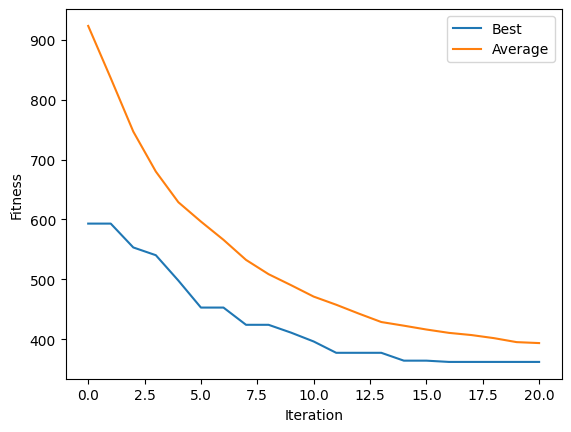

In [108]:
random.seed(0)
model = tsp()
populationSize = 600
maxIterations = 20
mutationRate = 0.7
tournamentSize = 25
best_fitness = GeneticAlgorithm(model, populationSize, maxIterations, mutationRate, tournamentSize)